### FBI UCR crime data

#### National crime data

In [1]:
import pandas as pd
import requests
import json

def html_dict_to_df(url,list_name):
    json_dict = requests.get(url).json()[list_name]
    python_dict = {}
    for d in json_dict:
        for k,v in d.items():
            python_dict.setdefault(k,[]).append(v)
    return pd.DataFrame(python_dict)

fbi_national_ucr_api = 'https://api.usa.gov/crime/fbi/sapi/api/estimates/national?api_key=uAynMrN9U7eOfOXpAfT69WyXcQ67deQaQB7Fggcl'

fbi_national_ucr = html_dict_to_df(fbi_national_ucr_api,'results')
fbi_national_ucr.drop(['state_id','state_abbr'],axis=1,inplace=True)
fbi_national_ucr.sort_values(['year'],inplace=True,ascending=False)
fbi_national_ucr

,year,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson
21,2017,325719178,1283220,17284,99856,135755.0,319356,810825,7694086,1401840,5519107,773139,42323
20,2016,323405935,1285606,17413,96970,132414.0,332797,802982,7928530,1516405,5644835,767290,45729
22,2015,320896618,1199310,15883,91261,126134.0,328109,764057,8024115,1587564,5723488,713063,43993
18,2014,318907401,1153022,14164,84864,118027.0,322905,731089,8209010,1713153,5809054,686803,46195
17,2013,316497531,1168298,14319,82109,113695.0,345093,726777,8651892,1932139,6019465,700288,47204
16,2012,313873685,1217057,14856,85141,NaN,355051,762009,9001992,2109932,6168874,723186,55336
15,2011,311587816,1206031,14661,84175,NaN,354772,752423,9052743,2185140,6151095,716508,54546
14,2010,309330219,1251248,14722,85593,NaN,369089,781844,9112625,2168459,6204601,739565,55986
13,2009,307006550,1325896,15399,89241,NaN,408742,812514,9337060,2203313,6338095,795652,59860
12,2008,304059724,1394461,16465,90750,NaN,443563,843683,9774152,2228887,6586206,959059,65789


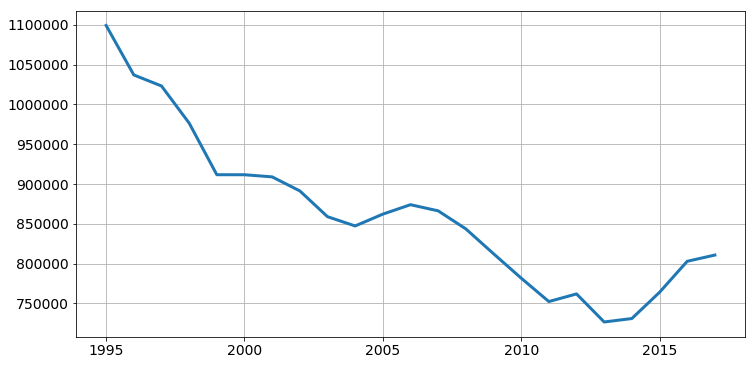

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size':14})
plt.grid()

plt.plot(fbi_national_ucr['year'],fbi_national_ucr['aggravated_assault'],lw=3)
# plt.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

#### City police department crime data

In [26]:
state_abbr = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', \
              'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', \
              'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', \
              'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', \
              'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', \
              'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', \
              'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', \
              'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', \
              'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', \
              'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'}

cities_table = pd.read_csv(r'C:\Users\1017298\Desktop\Geophysics\Jobs\DataIncubator\2018 Murders Nationally.csv')
city_state_dict = dict(zip(cities_table['City'], cities_table['State']))
city_pd_ori_dict = dict(zip(cities_table['City'], cities_table['ORI']))

In [31]:
# ORIs listed here: https://www.icpsr.umich.edu/files/NACJD/ORIs

url = 'https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/{ori}/offenses?api_key=uAynMrN9U7eOfOXpAfT69WyXcQ67deQaQB7Fggcl'

# TOP 10 MOST VIOLENT CITY FROM FORBES (https://www.forbes.com/pictures/mlj45jggj/cleveland-oh-3/#31958c2b419e)
# PLUS NEW ORLEANS ADDED IN
# ORIS IN DICTIONARY WERE LOOKED UP BY HAND - NEED A BETTER METHOD
# most_violent_cities_ori = {'Detroit':'MI8234900','St. Louis':'MOSPD0000','Oakland':'CA0010900','Memphis':'TNMPD0000',\
#                        'Birmingham':'AL0010200','Atlanta':'GAAPD0000','Baltimore':'MDBPD0000','Stockton':'CA0390500',\
#                        'Cleveland':'OHCLP0000','Buffalo':'NY0140100','New Orleans':'LANPD0000'}



fbi_cities_ucr = pd.DataFrame()
for k, v in city_pd_ori_dict.items():
    city_pd_url = url.replace('{ori}',v)
    city_df = html_dict_to_df(city_pd_url,'results')
    city_df.insert(1, 'city', k)
    fbi_cities_ucr = fbi_cities_ucr.append(city_df)

fbi_cities_ucr.reset_index(drop=True,inplace=True)
fbi_cities_ucr

,ori,city,data_year,offense,cleared,actual
0,AL0010200,Birmingham,1995,aggravated-assault,0,4122
1,AL0010200,Birmingham,1995,arson,41,283
2,AL0010200,Birmingham,1995,burglary,0,6399
3,AL0010200,Birmingham,1995,homicide,0,121
4,AL0010200,Birmingham,1995,human-trafficing,0,0
5,AL0010200,Birmingham,1995,larceny,0,16309
6,AL0010200,Birmingham,1995,motor-vehicle-theft,0,3680
7,AL0010200,Birmingham,1995,property-crime,0,26388
8,AL0010200,Birmingham,1995,rape,0,0
9,AL0010200,Birmingham,1995,rape-legacy,0,248


In [32]:
offense = fbi_cities_ucr[fbi_cities_ucr['offense']=='aggravated-assault']
offense

,ori,city,data_year,offense,cleared,actual
0,AL0010200,Birmingham,1995,aggravated-assault,0,4122
12,AL0010200,Birmingham,1996,aggravated-assault,0,2236
24,AL0010200,Birmingham,1997,aggravated-assault,0,2118
36,AL0010200,Birmingham,1998,aggravated-assault,0,1887
48,AL0010200,Birmingham,1999,aggravated-assault,0,1614
60,AL0010200,Birmingham,2000,aggravated-assault,0,1663
72,AL0010200,Birmingham,2001,aggravated-assault,0,1664
84,AL0010200,Birmingham,2002,aggravated-assault,0,1697
96,AL0010200,Birmingham,2003,aggravated-assault,0,1706
108,AL0010200,Birmingham,2004,aggravated-assault,0,1593


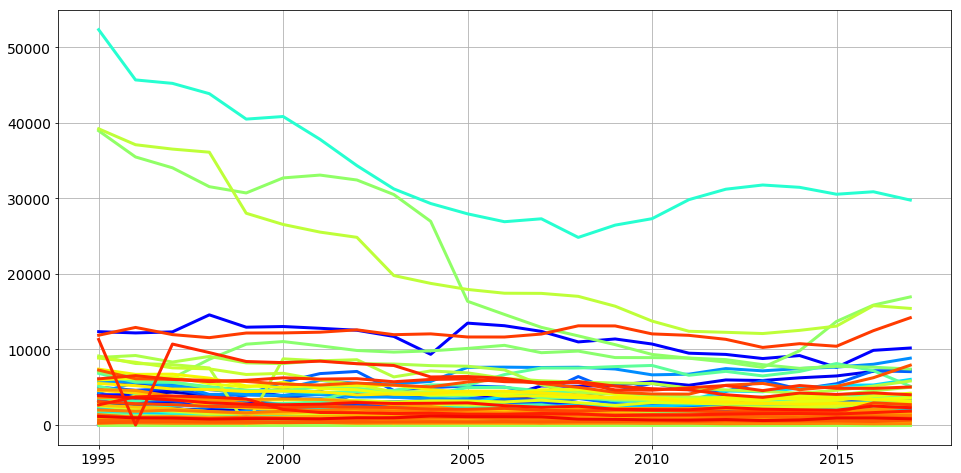

In [59]:
import numpy as np

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 14})
plt.grid()

offense = fbi_cities_ucr[fbi_cities_ucr['offense']=='aggravated-assault']
cities = set(fbi_cities_ucr['city'])
colors = [plt.cm.jet(i) for i in np.linspace(0, 0.9, len(cities))]

for city,color in zip(cities,colors):
    city_df = offense[offense['city']==city]
    plt.plot(city_df['data_year'],city_df['actual'],lw=3,c=color,label=city)
    
# plt.legend()

### US Census Bureau data
    A query consists of [base url] + [year] + [variables] + [geographical filters] + [api key]

    To query the US Census Burearu API, I need to find:
            - geographical codes for the cities I want
            - variable codes for the data I want

In [61]:
url_example = 'https://api.census.gov/data/2011/acs/acs1?get=B01001_001E,B01001_002E,B01001_026E,B01001A_002E,GEO_ID,NAME&for=principal%20city%20(or%20part):53000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:41860&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'

base_url = 'https://api.census.gov/data/2011/acs/acs1'
# before columns insert '?get='
columns = ['NAME','B01001', 'B01002', 'B01003', 'B02001', 'B07411', 'B17002', 'B19001', 'B191013', 'B19058', 'B19113', 'B19301']
# before first filter insert '&for=' and before second filter, '&in='
# after first filter insert ':' + city_code, and after second filter, ':' + metropolitan_area_code
filters = ['principal%20city%20(or%20part)','metropolitan%20statistical%20area/micropolitan%20statistical%20area']
# before key insert &key='
key = 'd97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'


#### geographical codes for cities

In [52]:


def html_list_to_df(url):
    df = pd.DataFrame(requests.get(url).json())
    return df.reindex(df.index.drop(0))

city_codes_url = 'https://api.census.gov/data/2014/acs/acs1/profile?get=NAME&for=principal%20city%20(or%20part):*&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'

all_city_codes = html_list_to_df(city_codes_url)
all_city_codes.rename({0:'city',1:'metropolitan_area_code',2:'city_code'},axis=1,inplace=True)

all_city_codes.insert(1,'city_orig',all_city_codes['city'])
for string in [' city',' village',' CDP']:
    all_city_codes['city'] = all_city_codes['city'].str.split(string).str[0]
#     all_city_codes.insert(0,'city_short',all_city_codes['city'].str.split(string).str[0])

my_city_codes = all_city_codes[all_city_codes['city'].isin(city_state_dict.keys())].reset_index(drop=True)
my_city_codes.insert(1,'state',my_city_codes['city'].map(city_state_dict))
my_city_codes.insert(2,'state_abbr',my_city_codes['state'].map(state_abbr))
my_city_codes = my_city_codes[my_city_codes.apply(lambda x: x['state_abbr']+';' in x['city_orig'], axis=1) == True].reset_index(drop=True)

# state ids
state_codes_url = 'https://api.census.gov/data/2015/acs/acs1?get=NAME&for=state:*&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'

state_codes = pd.DataFrame(requests.get(state_codes_url).json())
state_codes.columns = state_codes.iloc[0]
state_codes = state_codes[1:]
state_codes =  dict(zip(state_codes['NAME'], state_codes['state']))
my_city_codes['state_code'] = my_city_codes['state'].map(state_codes)

my_city_codes.drop_duplicates(inplace=True)
my_city_codes

,city,state,state_abbr,city_orig,metropolitan_area_code,city_code,state_code
0,Chicago,Illinois,IL,"Chicago city, IL; Chicago-Naperville-Elgin, IL...",16980,14000,17
1,Cincinnati,Ohio,OH,"Cincinnati city, OH; Cincinnati, OH-KY-IN Metr...",17140,15000,39
2,Cleveland,Ohio,OH,"Cleveland city, OH; Cleveland-Elyria, OH Metro...",17460,16000,39
3,Colorado Springs,Colorado,CO,"Colorado Springs city, CO; Colorado Springs, C...",17820,16000,08
4,Columbus,Ohio,OH,"Columbus city, OH; Columbus, OH Metro Area",18140,18000,39
5,Arlington,Texas,TX,"Arlington city, TX; Dallas-Fort Worth-Arlingto...",19100,04000,48
6,Dallas,Texas,TX,"Dallas city, TX; Dallas-Fort Worth-Arlington, ...",19100,19000,48
7,Fort Worth,Texas,TX,"Fort Worth city, TX; Dallas-Fort Worth-Arlingt...",19100,27000,48
8,Plano,Texas,TX,"Plano city, TX; Dallas-Fort Worth-Arlington, T...",19100,58016,48
9,Aurora,Colorado,CO,"Aurora city, CO; Denver-Aurora-Lakewood, CO Me...",19740,04000,08


In [53]:
my_city_codes[my_city_codes['state_code']=='20']

,city,state,state_abbr,city_orig,metropolitan_area_code,city_code,state_code
19,Kansas City,Kansas,KS,"Kansas City city, KS; Kansas City, MO-KS Metro...",28140,36000,20
71,Wichita,Kansas,KS,"Wichita city, KS; Wichita, KS Metro Area",48620,79000,20


#### codes for variables I want returned

In [64]:
# groups = ['NAME','B01001', 'B01002', 'B01003', 'B02001', 'B07411', 'B17002', 'B19001', 'B191013', 'B19058', 'B19113', 'B19301']
group_dict = {'B01001':'SEX BY AGE',\
             'B01002':'MEDIAN AGE BY SEX',\
             'B01003':'TOTAL POPULATION',\
             'B02001':'RACE',\
             'B07411':'MEDIAN INCOME IN THE PAST 12 MONTHS(IN 2014 INFLATION-ADJUSTED DOLLARS)',\
             'B17002':'RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS',\
             'B19001':'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS)',\
             'B191013':'MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS',\
             'B19058':'PUBLIC ASSISTANCE INCOME OR FOOD STAMPS/SAP IN THE PAST 12 MONTHS FOR HOUSEHOLDS',\
             'B19113':'MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS)',\
             'B19301':'PER CAPITA INCOME IN THE PAST 12 MONTHS (ADJUSTED)'}


variables_url = 'https://api.census.gov/data/2014/acs/acs1/variables'

all_variable_codes = pd.DataFrame(requests.get(variables_url).json())
all_variable_codes.rename({0:'code',1:'type_name',2:'concept'},axis=1,inplace=True)

all_variable_codes.insert(0,'group',all_variable_codes['code'].str.split('_').str[0])
all_variable_codes.insert(1,'type',all_variable_codes['code'].str.split('_').str[1])
all_variable_codes.insert(2,'group_name',all_variable_codes['group'].map(group_dict))

all_variable_codes = all_variable_codes.reindex(all_variable_codes.index.drop(0)).drop(['concept'],axis=1)


all_variable_codes['type_name'] = all_variable_codes['type_name'].str.replace('Estimate!!Total','').str.replace('!','')

fewer_variable_codes = all_variable_codes[(all_variable_codes['group'].isin(group_dict.keys()))&\
                                          ~(all_variable_codes['type_name'].str.contains('to'))&\
                                          ~(all_variable_codes['type_name'].str.contains('years'))]


my_variable_codes = fewer_variable_codes.reindex(fewer_variable_codes.\
                                index.drop([3286,3374,30735,30736,30740,30790,28906,28919]))
my_variable_codes['name'] = [my_variable_codes['group_name'][x] if my_variable_codes['type_name'][x] == '' else my_variable_codes['type_name'][x] for x in my_variable_codes.index]

keys = list(my_variable_codes['code'])
values = list(my_variable_codes['name'])
my_variable_dict = {k: v for k, v in zip(keys, values)}

my_variable_codes

,group,type,group_name,code,type_name,name
3372,B17002,001E,RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 1...,B17002_001E,,RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 1...
7322,B01002,001E,MEDIAN AGE BY SEX,B01002_001E,EstimateMedian ageTotal,EstimateMedian ageTotal
7323,B01002,002E,MEDIAN AGE BY SEX,B01002_002E,EstimateMedian ageMale,EstimateMedian ageMale
7332,B01002,003E,MEDIAN AGE BY SEX,B01002_003E,EstimateMedian ageFemale,EstimateMedian ageFemale
9518,B19001,002E,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 201...,B19001_002E,"Less than $10,000","Less than $10,000"
9533,B19001,001E,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 201...,B19001_001E,,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 201...
9593,B19001,017E,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 201...,B19001_017E,"$200,000 or more","$200,000 or more"
12965,B01001,026E,SEX BY AGE,B01001_026E,Female,Female
13190,B01001,001E,SEX BY AGE,B01001_001E,,SEX BY AGE
13193,B01001,002E,SEX BY AGE,B01001_002E,Male,Male


In [199]:
year = '2015'
variables = set(my_variable_codes['code'])
# variable_names = 
# filters = 
key = 'd97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'


test_url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city%20(or%20part):{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}&key={4}'.format(year,','.join(variables),'07000','13820',key)
test_url

'https://api.census.gov/data/2015/acs/acs1?get=B19001_017E,B19058_002E,B01002_001E,B02001_003E,B19058_003E,B17002_001E,B02001_005E,B01001_002E,B02001_006E,B01001_001E,B02001_004E,B02001_001E,B19301_001E,B01003_001E,B19001_002E,B01002_002E,B01002_003E,B02001_002E,B07411_001E,B19058_001E,B19113_001E,B01001_026E,B19001_001E&for=principal%20city%20(or%20part):07000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:13820&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'

In [234]:
year = '2015'
key = 'd97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'

test_url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city:{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}%20state:{4}&key={5}'.format(year,','.join(variables),'07000','13820','01',key)
test_url

'https://api.census.gov/data/2015/acs/acs1?get=B19001_017E,B19058_002E,B01002_001E,B02001_003E,B19058_003E,B17002_001E,B02001_005E,B01001_002E,B02001_006E,B01001_001E,B02001_004E,B02001_001E,B19301_001E,B01003_001E,B19001_002E,B01002_002E,B01002_003E,B02001_002E,B07411_001E,B19058_001E,B19113_001E,B01001_026E,B19001_001E&for=principal%20city:07000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:13820%20state:01&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'

In [ ]:
year = '2017'
key = 'd97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'

test_url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city(or%20part):{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}%20state:{4}&key={5}'.format(year,','.join(variables),'07000','13820','01',key)
test_url

In [250]:
year = 2015

# url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city:{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}%20state:{4}&key={5}'.format(year,','.join(variables),city_code,area_code,state_code,key)
# df = pd.DataFrame(requests.get(url).json())

url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city:{2}&in=metropolitan%20statistical%20area
/micropolitan%20statistical%20area:{3}%20state:{4}&key={5}'.format(year,','.join(variables),city_code,area_code,state_code,key)

url

'https://api.census.gov/data/2015/acs/acs1?get=B19001_017E,B19058_002E,B01002_001E,B02001_003E,B19058_003E,B17002_001E,B02001_005E,B01001_002E,B02001_006E,B01001_001E,B02001_004E,B02001_001E,B19301_001E,B01003_001E,B19001_002E,B01002_002E,B01002_003E,B02001_002E,B07411_001E,B19058_001E,B19113_001E,B01001_026E,B19001_001E&for=principal%20city:11000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:15380%20state:36&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'

In [90]:

city_code = '07000'
area_code = '13820'
state_code = '01'

# url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city%20(or%20part):{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}%20state:{4}&key={5}'.format(year,','.join(variables),city_code,area_code,state_code,key)
url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city%20(or%20part):{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}%20state:{4}&key={5}'.format(year,','.join(variables),city_code,area_code,state_code,key)

url

'https://api.census.gov/data/2017/acs/acs1?get=B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,B07411_001E,B19001_017E,B02001_001E,B02001_002E,B01001_002E,B19058_002E,B01002_001E,B01003_001E,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E&for=principal%20city%20(or%20part):07000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:13820%20state:01&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'

In [91]:
variables = set(my_variable_codes['code'])
key = 'd97a6cd25502fb45fc3f8fb86238e6c1ba32d24e'


# test_url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city%20(or%20part):{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}&key={4}'.format(year,','.join(variables),'07000','13820',key)

all_data = pd.DataFrame()
# for year in range(2011,2015):
#     for city,state,area_code,city_code in zip(my_city_codes['city'],my_city_codes['state'],my_city_codes['metropolitan_area_code'],my_city_codes['city_code']):
# #         if year in [2011,2012,2013,2014]:#range(2011,2015):
#         url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city%20(or%20part):{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}&key={4}'.format(year,','.join(variables),city_code,area_code,key)
# #         elif year in [2015,2016]:
# #             url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city:{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}%20state:{4}&key={5}'.format(year,','.join(variables),city_code,area_code,state_code,key)
# #         print(url)
#         df = pd.DataFrame(requests.get(url).json())
#         df.columns = df.iloc[0]
#         df = df[1:]
#         df.insert(0,'year',year)
#         df.insert(1,'city',city)
#         df['state'] = state
#         try:
#             df.rename({'principal city (or part)':'principal city'},axis=1)
#         except:
#             pass
#         all_data = all_data.append(df)
        

# # # # test_url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city:{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}%20state:{4}&key={5}'.format(year,','.join(variables),'07000','13820','01',key)
# for year in range(2015,2017):
#     for city,area_code,city_code,state_code in zip(my_city_codes['city'],my_city_codes['metropolitan_area_code'],my_city_codes['city_code'],my_city_codes['state_code']):
#         url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city:{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}%20state:{4}&key={5}'.format(year,','.join(variables),city_code,area_code,state_code,key)
#         df = pd.DataFrame(requests.get(url).json())
#         df.columns = df.iloc[0]
#         df = df[1:]
#         df.insert(0,'year',year)
#         df.insert(1,'city',city)
#         all_data = all_data.append(df)
  
year = '2017' #'2010'
for city,area_code,city_code,state_code in zip(my_city_codes['city'],my_city_codes['metropolitan_area_code'],my_city_codes['city_code'],my_city_codes['state_code']):
    url = 'https://api.census.gov/data/{0}/acs/acs1?get={1}&for=principal%20city%20(or%20part):{2}&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:{3}%20state:{4}&key={5}'.format(year,','.join(variables),city_code,area_code,state_code,key)

    df = pd.DataFrame(requests.get(url).json())
    df.columns = df.iloc[0]
    df = df[1:]
    df.insert(0,'year',year)
    df.insert(1,'city',city)
    all_data = all_data.append(df)

        
all_data = all_data.reset_index(drop=True)

numerical_cols = [x for x in list(all_data) if x.startswith('B')]

for col in numerical_cols:
    all_data[col] = all_data[col].astype(float).fillna(0.0)
    
all_data

https://api.census.gov/data/2017/acs/acs1?get=B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,B07411_001E,B19001_017E,B02001_001E,B02001_002E,B01001_002E,B19058_002E,B01002_001E,B01003_001E,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E&for=principal%20city%20(or%20part):14000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:16980%20state:17&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e
https://api.census.gov/data/2017/acs/acs1?get=B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,B07411_001E,B19001_017E,B02001_001E,B02001_002E,B01001_002E,B19058_002E,B01002_001E,B01003_001E,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E&for=principal%20city%20(or%20part):15000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:17140%20state:39&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e
https://

https://api.census.gov/data/2017/acs/acs1?get=B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,B07411_001E,B19001_017E,B02001_001E,B02001_002E,B01001_002E,B19058_002E,B01002_001E,B01003_001E,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E&for=principal%20city%20(or%20part):36003&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:26900%20state:18&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e
https://api.census.gov/data/2017/acs/acs1?get=B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,B07411_001E,B19001_017E,B02001_001E,B02001_002E,B01001_002E,B19058_002E,B01002_001E,B01003_001E,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E&for=principal%20city%20(or%20part):35000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:27260%20state:12&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e
https://

https://api.census.gov/data/2017/acs/acs1?get=B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,B07411_001E,B19001_017E,B02001_001E,B02001_002E,B01001_002E,B19058_002E,B01002_001E,B01003_001E,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E&for=principal%20city%20(or%20part):55000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:35380%20state:22&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e
https://api.census.gov/data/2017/acs/acs1?get=B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,B07411_001E,B19001_017E,B02001_001E,B02001_002E,B01001_002E,B19058_002E,B01002_001E,B01003_001E,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E&for=principal%20city%20(or%20part):36000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:35620%20state:34&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e
https://

https://api.census.gov/data/2017/acs/acs1?get=B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,B07411_001E,B19001_017E,B02001_001E,B02001_002E,B01001_002E,B19058_002E,B01002_001E,B01003_001E,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E&for=principal%20city%20(or%20part):53000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:41860%20state:06&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e
https://api.census.gov/data/2017/acs/acs1?get=B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,B07411_001E,B19001_017E,B02001_001E,B02001_002E,B01001_002E,B19058_002E,B01002_001E,B01003_001E,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E&for=principal%20city%20(or%20part):67000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:41860%20state:06&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e
https://

https://api.census.gov/data/2017/acs/acs1?get=B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,B07411_001E,B19001_017E,B02001_001E,B02001_002E,B01001_002E,B19058_002E,B01002_001E,B01003_001E,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E&for=principal%20city%20(or%20part):75000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:46140%20state:40&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e
https://api.census.gov/data/2017/acs/acs1?get=B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,B07411_001E,B19001_017E,B02001_001E,B02001_002E,B01001_002E,B19058_002E,B01002_001E,B01003_001E,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E&for=principal%20city%20(or%20part):82000&in=metropolitan%20statistical%20area/micropolitan%20statistical%20area:47260%20state:51&key=d97a6cd25502fb45fc3f8fb86238e6c1ba32d24e
https://

,year,city,B19058_001E,B19058_003E,B02001_003E,B19001_002E,B01002_002E,B19113_001E,B02001_004E,B02001_006E,...,B17002_001E,B01002_003E,B01001_001E,B19301_001E,B01001_026E,B02001_005E,B19001_001E,metropolitan statistical area/micropolitan statistical area,state,principal city (or part)
0,2017,Chicago,1047695,841637,809079,102800,33.9,64441,7819,390,...,2664017,35.3,2716462,34269,1398771,181505,1047695,16980,17,14000
1,2017,Cincinnati,140911,112459,128044,19583,31.3,55434,258,531,...,289079,33.9,301305,29465,155263,7944,140911,17140,39,15000
2,2017,Cleveland,171717,112068,187759,31814,35.7,35053,1871,36,...,375216,36.8,385552,19401,202964,9319,171717,17460,39,16000
3,2017,Colorado Springs,181677,161065,26209,9136,32.7,71772,5133,2375,...,455370,37.0,464470,31585,230547,11075,181677,17820,08,16000
4,2017,Columbus,355414,301239,252625,28370,31.4,61094,2698,369,...,857256,32.9,881901,27544,449703,53100,355414,18140,39,18000
5,2017,Arlington,131485,118181,99168,8107,31.8,66985,1188,404,...,391117,34.4,396407,25807,203992,22775,131485,19100,48,04000
6,2017,Dallas,513084,442662,328114,43595,32.0,55540,4245,959,...,1326505,32.9,1341103,32114,679177,49720,513084,19100,48,19000
7,2017,Fort Worth,299593,263348,155053,19239,32.2,69973,2323,404,...,861129,33.6,876060,28174,448318,38469,299593,19100,48,27000
8,2017,Plano,106078,103657,26049,4038,37.7,105512,1173,277,...,284097,40.3,285312,46412,143385,56201,106078,19100,48,58016
9,2017,Aurora,128100,115120,58459,5204,34.0,74160,3015,1049,...,364095,35.0,367250,29099,185643,28722,128100,19740,08,04000


In [104]:
all_data.to_csv(r'C:\Users\1017298\Desktop\Geophysics\Jobs\DataIncubator\all_data.csv')

In [101]:
all_data_race_stats = all_data[['city']+[x for x in list(all_data) if x.startswith('B02001')]].reset_index(drop=True)
all_data_race_stats.set_index(all_data_race_stats['city'],inplace=True)
all_data_race_stats.drop('city',axis=1,inplace=True)

all_data_race_stats['maj/total'] = all_data_race_stats.max(axis=1)/all_data_race_stats.sum(axis=1)
all_data_race_stats.sort_values('maj/total',ascending = False,inplace=True)
all_data_race_stats

,B02001_003E,B02001_004E,B02001_006E,B02001_001E,B02001_002E,B02001_005E,maj/total
city,,,,,,,
Santa Ana,2941.0,1034.0,1325.0,334135.0,117032.0,40138.0,0.672839
Riverside,21930.0,2603.0,399.0,327722.0,157604.0,27379.0,0.609560
Los Angeles,362079.0,24208.0,6170.0,3999742.0,2033975.0,461936.0,0.580673
Stockton,38074.0,1477.0,2042.0,310476.0,123347.0,65267.0,0.574229
Oakland,99476.0,3160.0,2696.0,425204.0,145499.0,66084.0,0.572959
Sacramento,70339.0,5008.0,10238.0,501890.0,207994.0,94903.0,0.563686
Long Beach,59564.0,3116.0,3307.0,469459.0,238911.0,63147.0,0.560545
San Jose,29587.0,7629.0,4733.0,1035353.0,404330.0,368311.0,0.559668
Newark,144527.0,488.0,215.0,285156.0,77158.0,5106.0,0.556239


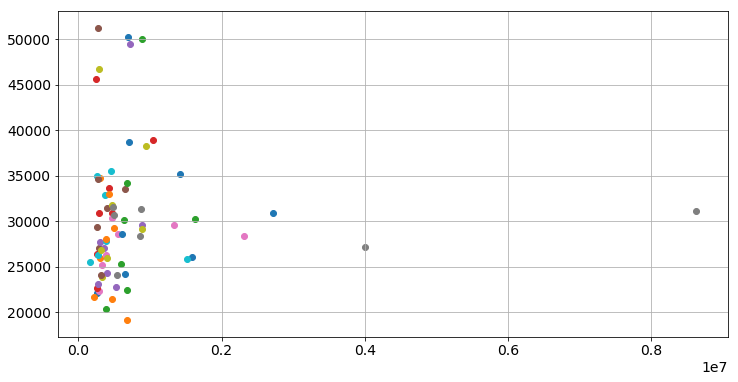

In [102]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 14})
plt.grid()

year = '2017'

all_data_year = all_data[all_data['year']==year]

for city,color in zip(all_data_year['city'],colors):
    df = all_data_year[all_data_year['city']==city]
    plt.scatter(int(df['B01003_001E']), int(df['B07411_001E']))#, c=color, label=city,s=100)
    
# plt.legend(loc='upper left')

In [240]:
list(all_data)

['B01001_001E',
 'B01001_002E',
 'B01001_026E',
 'B01002_001E',
 'B01002_002E',
 'B01002_003E',
 'B01003_001E',
 'B02001_001E',
 'B02001_002E',
 'B02001_003E',
 'B02001_004E',
 'B02001_005E',
 'B02001_006E',
 'B07411_001E',
 'B17002_001E',
 'B19001_001E',
 'B19001_002E',
 'B19001_017E',
 'B19058_001E',
 'B19058_002E',
 'B19058_003E',
 'B19113_001E',
 'B19301_001E',
 'city',
 'metropolitan statistical area/micropolitan statistical area',
 'principal city',
 'principal city (or part)',
 'state',
 'year']

In [55]:
group_dict = {'B01001':'SEX BY AGE',\
             'B01002':'MEDIAN AGE BY SEX',\
             'B01003':'TOTAL POPULATION',\
             'B02001':'RACE',\
             'B07411':'MEDIAN INCOME IN THE PAST 12 MONTHS(IN 2014 INFLATION-ADJUSTED DOLLARS)',\
             'B17002':'RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS',\
             'B19001':'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS)',\
             'B191013':'MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS',\
             'B19058':'PUBLIC ASSISTANCE INCOME OR FOOD STAMPS/SAP IN THE PAST 12 MONTHS FOR HOUSEHOLDS',\
             'B19113':'MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS)',\
             'B19301':'PER CAPITA INCOME IN THE PAST 12 MONTHS (ADJUSTED)'}
race_dict = {'A':'WHITE','B':'BLACK OR AFRIAN AMERICAN','C':'AMERICAN INDIAN AND ALASKA NATIVE','D':'ASIAN',\
             'E':'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER','F':'OTHER','G':'TWO OR MORE RACES',\
             'H':'WHITE, NOT HISPANIC OR LATINO','I':'HISPANIC OR LATINO'}





In [99]:
groups_url = 'https://api.census.gov/data/2013/acs/acs1/groups'

groups = fbi_html_to_df(groups_url,'groups')
group_names = set(groups[groups['name'].isin(columns)]['name'])
group_names

{'B01001',
 'B01002',
 'B01003',
 'B02001',
 'B07411',
 'B17002',
 'B19001',
 'B19058',
 'B19113',
 'B19301'}